# brazil_monthly_deaths - Jupyter Example

## See the data

First have a look on the data. The `data` variable is a pandas dataframe with data from 2015 to 2020.

In [1]:
from brazil_monthly_deaths import data

df = data
display(df) # from 2015 to 2020

,city_id,year,month,region,state,city,deaths
0,82280746,2015,1,North,Acre,Brasiléia,6
1,43868530,2015,1,North,Acre,Bujari,1
2,70178755,2015,1,North,Acre,Cruzeiro do Sul,38
3,69033674,2015,1,North,Acre,Epitaciolândia,3
4,19178699,2015,1,North,Acre,Feijó,8
...,...,...,...,...,...,...,...
225952,26419055,2020,5,Southeast,São Paulo,Zacarias,1
225953,69051168,2020,5,Southeast,São Paulo,Águas de Lindóia,6
225954,85750597,2020,5,Southeast,São Paulo,Álvares Florence,1
225955,54364031,2020,5,Southeast,São Paulo,Álvares Machado,12


## Get new data and update the old data

Every day there are new records, so you should get the most recent data. Keep in mind that the official data have a **legal deadline of 13 days to go from one's death to the official records**.

>Depending on your internet connection it may take up to 6 minutes for each month if you run for all states. Consider selecting only the states you want to work on.

In [5]:
from brazil_monthly_deaths import brazil_deaths, update_df

# If you want to work get all data for the May 2020:
# new_data = brazil_deaths(years=[2020], months=[5])

# Select a single state for our example, running on 05/21/2020
new_data = brazil_deaths(
                years=[2020],
                months=[5],
                states=["Amazonas"],
                verbose=False,
                save_csv=False)

# update the lagging data provided by this package
df = update_df(data, new_data)

## Data exploration

### Selecting the data

In [20]:
manaus_data = df.loc[
    (df['state'] == "Amazonas") &
    (df['city'] == "Manaus") &
    (df['month'] >= 2) &
    (df['month'] <= 4)
]

### Plotting the data

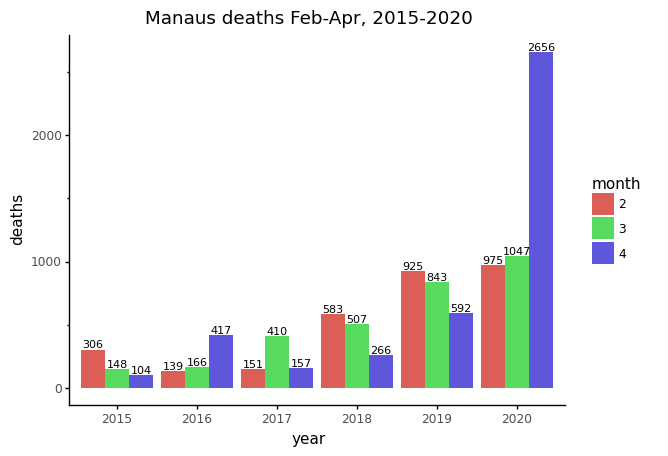

<ggplot: (309142406)>

In [50]:
import pandas as pd
from plotnine import *

# select only the variables used in the plot
manaus_data = manaus_data[['year', 'month', 'deaths']]

# transform month to category
manaus_data['month'] = pd.Categorical(manaus_data['month'])

# plot the data
dodge_text = position_dodge(width=0.9)
(
    ggplot(manaus_data, aes(x='year', y='deaths', fill='month'))
        + geom_col(stat='identity', position='dodge')
        + ggtitle("Manaus deaths Feb-Apr, 2015-2020")
        + geom_text(aes(label='deaths'), position=dodge_text, size=8, va='bottom')
        + theme_classic()
)  